# Visualizing the Isocontours of Quadratic Forms

Enable equation numbering.

In [ ]:
%%javascript
MathJax.Hub.Config({
    TeX: { equationNumbers: { autoNumber: "AMS" } }
});

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import matplotlib as mpl
mpl.rcParams["figure.figsize"] = [12.0, 10.0]
mpl.rcParams["legend.fontsize"] = "large"
mpl.rcParams["figure.titlesize"] = "medium"

from warnings import simplefilter
simplefilter("ignore", UserWarning)

## The Quadratic Form and the Inverse of $A$

We consider a **symmetric** matrix $A \in \mathbb{R}^{d \times d}$ with eigenvalues $\lambda_1, \ldots, \lambda_d$.
In this notebook, we always have $d=2$, since that is pretty much the limit of easy visualization.

The isocontours of the quadratic form $x^\top A x$ is very closely related to $A^{-1}$ and $A^{-\frac{1}{2}}$.

Okay let's consider the case when $d=2$. $A$ looks like $\begin{bmatrix}a&b\\b&c\end{bmatrix}$ and $x$ looks like $\begin{bmatrix}x_1\\x_2\end{bmatrix}$. Hence, the quadratic form becomes:

\begin{align}
    &\begin{bmatrix}x_1&x_2\end{bmatrix} \begin{bmatrix}a&b\\b&c\end{bmatrix} \begin{bmatrix}x_1\\x_2\end{bmatrix} \nonumber \\
    = &\begin{bmatrix}ax_1 + bx_2 & bx_1 + cx_2\end{bmatrix} \begin{bmatrix}x_1\\x_2\end{bmatrix} \nonumber \\
    = &ax_1^2 + 2bx_1x_2 + cx_2^2 \label{exp:1}
\end{align}

Does expression \ref{exp:1} look familiar? The equation of a circle centered at the origin with radius 2 is:
\begin{align}
    \frac{x_1^2}{2^2} + \frac{x_2^2}{2^2} &= 1 \label{circle}
\end{align}

You can see that in [Desmos](https://www.desmos.com/calculator/pzexd9da7d) too. An axis-aligned ellipse centered at the origin with a radius of 2 along the $x_1$ direction and a radius of 3 along the $x_2$ direction has the following equation:
\begin{align}
    \frac{x_1^2}{2^2} + \frac{x_2^2}{3^2} &= 1 \label{ellipse}
\end{align}

Note that if we replace either **but not both** $+$ with a $-$, we get hyperbolae (also on [Desmos](https://www.desmos.com/calculator/pzexd9da7d)).

So what do the coefficients $a$, $b$, and $c$ represent in expression \ref{exp:1}? In all the axis-aligned examples, observe that $b=0$, so perhaps it has something to do with the tilt of the axes. If we want to rewrite the equation of the circle, we can pattern-match equation \ref{circle} and expression \ref{exp:1} and get:
\begin{align}
         \frac{x_1^2}{2^2} + \frac{x_2^2}{2^2} &= 1 \nonumber \\
\implies \left(\frac{1}{2}\right)^2x_1^2 + \left(\frac{1}{2}\right)^2x_2^2 + 0x_1x_2 &= 1 \nonumber \\
\implies \begin{bmatrix}x_1&x_2\end{bmatrix} \begin{bmatrix} \frac{1}{2^2} & 0 \\ 0 & \frac{1}{2^2} \end{bmatrix} \begin{bmatrix}x_1\\x_2\end{bmatrix} &= 1 \label{mat_circ}
\end{align}

If we consider a function $f(x) = x^\top \begin{bmatrix} \frac{1}{2^2} & 0 \\ 0 & \frac{1}{2^2} \end{bmatrix} x$, then a circle with radius 2 is the isocontour of that function with isovalue 1: $f(x) = 1$ is a circle as we can see in equation \ref{mat_circ}. Now, as defined above, $f(x)$ is the quadratic form of $\begin{bmatrix} \frac{1}{2^2} & 0 \\ 0 & \frac{1}{2^2} \end{bmatrix}$. But we still haven't seen where the inverse comes in, but maybe you can see some of the intuition already.

Doing a similar pattern-matching exercise with equation \ref{ellipse} and expression \ref{exp:1}, we get that the quadratic form $x^\top \begin{bmatrix} \frac{1}{2^2} & 0 \\ 0 & \frac{1}{3^2} \end{bmatrix} x$ has isocontours shaped like ellipses, and its isocontour with isovalue 1 is precisely the ellipse described by equation \ref{ellipse}.

Notice that the eigenvectors of $\begin{bmatrix} \frac{1}{2^2} & 0 \\ 0 & \frac{1}{3^2} \end{bmatrix}$ are $\begin{bmatrix} 1 \\ 0 \end{bmatrix}$ and $\begin{bmatrix} 0 \\ 1 \end{bmatrix}$, with respective eigenvalues $\lambda_1 = \frac{1}{2^2}$ and $\lambda_2 = \frac{1}{3^2}$. You can also verify this for the quadratic form with circular isocontours. Notice that the principal axes of the ellipse are aligned with the eigenvectors and have length $\frac{1}{\sqrt{\lambda_1}}$ and $\frac{1}{\sqrt{\lambda_2}}$ respectively. Is this ringing some bells now? What matrix do we know of that has the same eigenvectors as $A$ but eigenvalues $\frac{1}{\lambda_1}$ and $\frac{1}{\lambda_2}$? That is $A^{-1}$. And by extension, $A^{-\frac{1}{2}}$ has eigenvalues $\frac{1}{\sqrt{\lambda_1}}$ and $\frac{1}{\sqrt{\lambda_2}}$. Hence, the isocontours of the quadratic form $x^\top A x$ have radii proportional to the eigenvalues of $A^{-\frac{1}{2}}$.

And what happened to $b$, you ask? It will be nonzero for non-axis-aligned ellipses and hyperbolae, and its precise effect is hard to describe beyond using it to compute the eigenthings of $A^{-1}$. The principal axes are always aligned with the eigenvectors, and have lengths proportional to the square root of the eigenvalues of $A^{-1}$.

## Visuals!!!

The function below evaluates the quadratic form $x^\top A x$. It uses some Numpy-fu to vectorize the evaluation of the quadratic form on multiple points without doing unnecessary computations (the naive implementation of this function would also compute all bilinear forms in addition to quadratic forms).

In [7]:
def quad_form(A: np.ndarray, x: np.ndarray) -> np.ndarray:
    """Efficiently computes x.T A x.
    A has shape (d, d)
    x has shape (n, d)
    output has shape (n,)
    """
    return np.sum((x @ A) * x, axis=1)

Setup for plotting.

In [8]:
H, W = 256, 256  # size of grid to evaluate the quadratic form
LEVELS = 15  # default number of levels in the contour plot

# setup for points where we'll evaluate the quadratic form
x1 = np.linspace(-3, 3, H)
x2 = np.linspace(-3, 3, W)
X1_plot, X2_plot = np.meshgrid(x1, x2)
X = np.hstack((X1_plot.reshape(-1, 1), X2_plot.reshape(-1, 1)))

def plot_qf(A: np.ndarray, levels: int = LEVELS) -> None:
    """Plots the quadratic form of A."""
    qf = quad_form(A, X).reshape(H, W)
    
    plt.contourf(X1_plot, X2_plot, qf, levels, alpha=.75, cmap=plt.cm.hot)
    plt.colorbar()
    C = plt.contour(X1_plot, X2_plot, qf, levels, colors='black', linewidth=.5)
    plt.clabel(C, inline=1, fontsize=10)
    plt.xlabel("x1", fontsize=14)
    plt.ylabel("x2", fontsize=14)

#     plt.show()
#     plt.close()

### The Circular Quadratic Form
Can you see where the isocontour with isovalue 1 is?

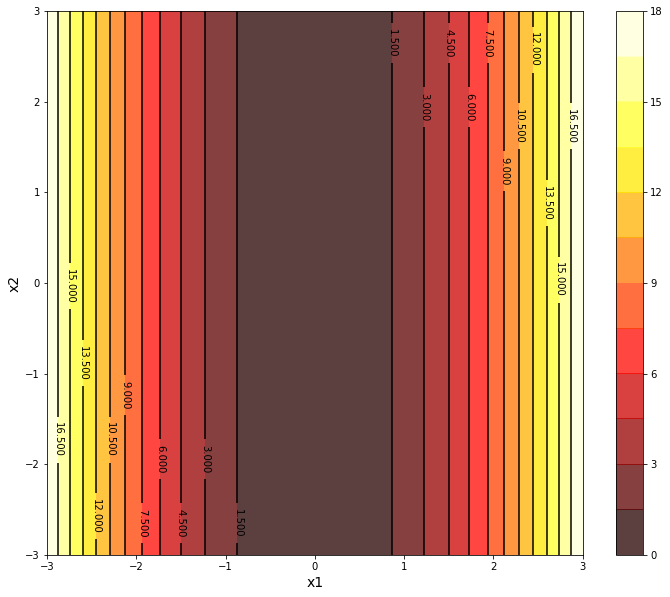

In [23]:
A = np.array([[2, 0],
              [0, 0.]])

plot_qf(A, levels=15)

### The Ellipsoidal Quadratic Form
Can you see where the isocontour with isovalue 1 is?

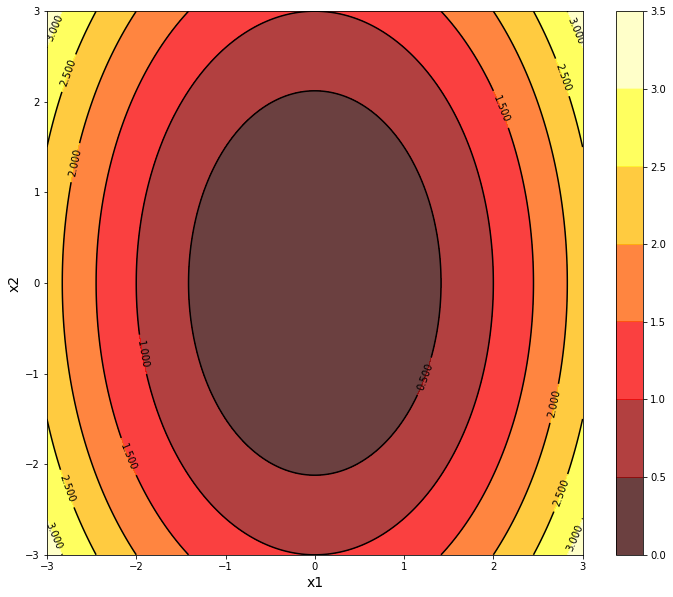

In [14]:
A = np.array([[1/4, 0],
              [0, 1/9.]])

plot_qf(A, levels=7)

### Hyperbolic Quadratic Form
See how the matrix $A$ is different here from the two examples above?

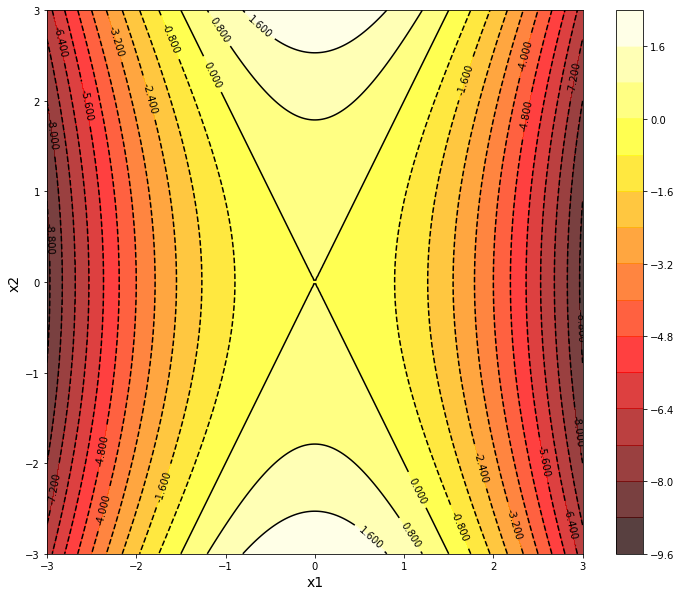

In [18]:
A = np.array([[-1, 0],
              [0, 1/4]])

plot_qf(A, levels=15)

### General Quadratic Forms with Specified Eigenthings
Enter two eigenvectors $v_1$ and $v_2$ along with their eigenvalues $\lambda_1$ and $\lambda_2$ and run the cell to visualize the quadratic forms where they are the eigenthings of the matrix $A$. Try making the eigenvectors point in different directions. Try all sorts of eigenvalues: positive, negative, zero, and see what happens. Play with the parameter `levels` if you cannot see the isocontour with isovalue 1 and you want to see it. It specifies the number of isolines drawn.

**Please make sure that the eigenvectors are orthogonal to each other**. This is easy enough in 2D. The code takes care of normalizing the eigenvectors so you only bother yourself with their directions.

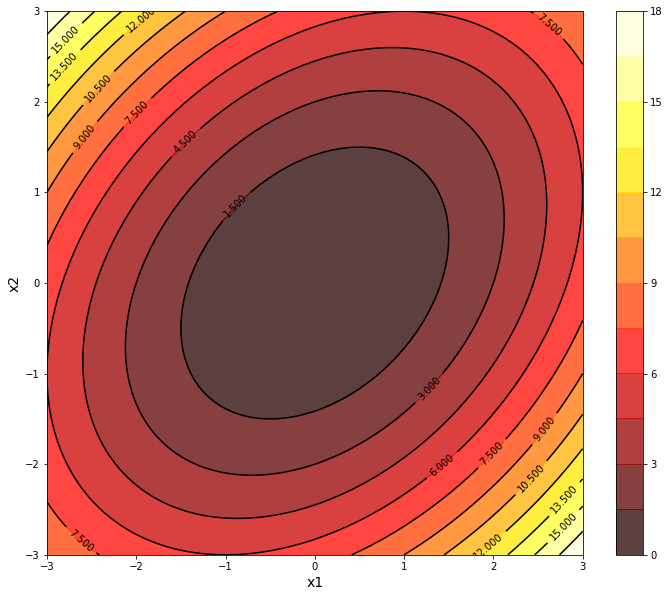

In [28]:
# tweak these!
# make sure these are orthogonal
v_1 = np.array([1/np.sqrt(2), 1/np.sqrt(2)])
v_2 = np.array([1/np.sqrt(2), -1/np.sqrt(2)])

# try all sorts of values for the eigenvalues
lambda_1 = 1/2
lambda_2 = 1

# normalizing the eigenvectors
v_1 = v_1 / np.linalg.norm(v_1)
v_2 = v_2 / np.linalg.norm(v_2)

# constructing A from its eigendecomposition
V = np.vstack((v_1, v_2)).T
A = V @ np.diag(np.array([lambda_1, lambda_2])) @ V.T

# plot the quadratic form
plot_qf(A, levels=15)